This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Plotting Radar Scan Strategy

This notebook shows how to plot the scan strategy of a specific radar.

In [1]:
import wradlib as wrl
import matplotlib.pyplot as pl
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

/home/runner/micromamba-root/envs/wradlib-notebooks/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setup Radar details

In [2]:
nrays = 360
nbins = 150
range_res = 500.0
ranges = np.arange(nbins) * range_res
elevs = [28.0, 18.0, 14.0, 11.0, 8.2, 6.0, 4.5, 3.1, 2.0, 1.0]
sitecoords = (-28.1, 38.42, 450.0)
beamwidth = 1.0

## Standard Plot

This works with some assumptions:

- beamwidth = 1.0
- vert_res = 500.0
- maxalt = 10000.0
- units = 'm'

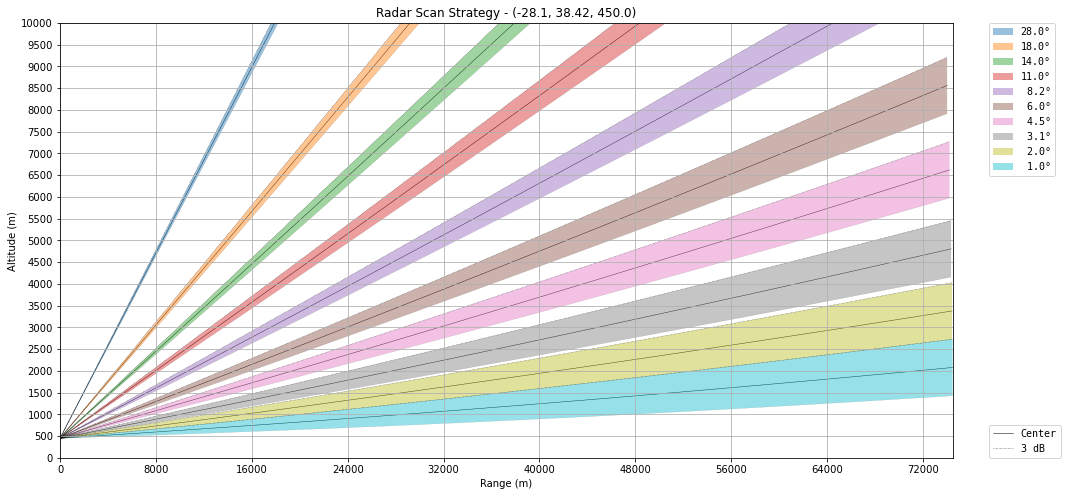

In [3]:
ax = wrl.vis.plot_scan_strategy(ranges, elevs, sitecoords)

## Change Plot Style

### Plot Axes in Kilometer

To quickly change the Axes tickmarks and labels from meter to kilometer, just add keyword argument `units='km'`.

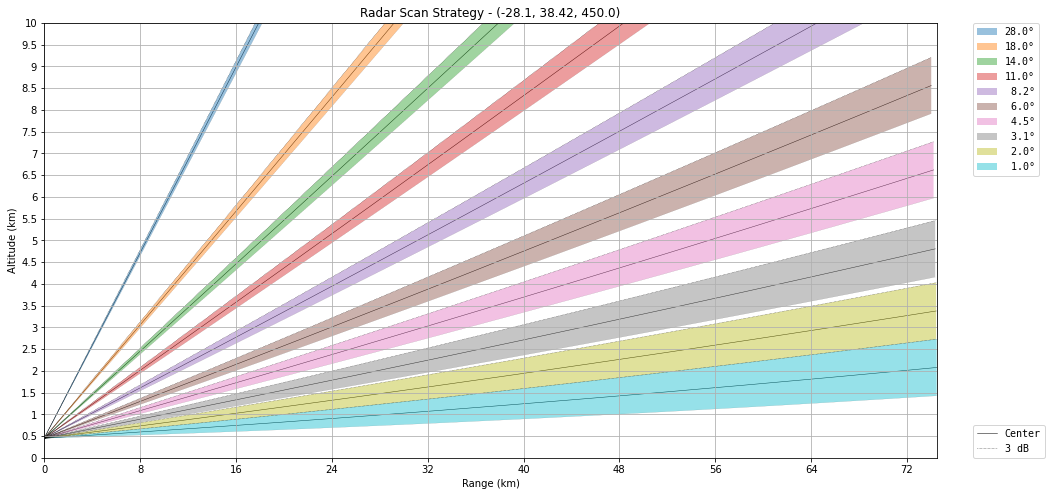

In [4]:
ax = wrl.vis.plot_scan_strategy(ranges, elevs, sitecoords, units="km")

### Change Axes Resolution and Range

The horizontal and vertical Axes Resolution and Range can be set by feeding keyword arguments `vert_res`, `maxalt`, `range_res`, `max_range` in meter.

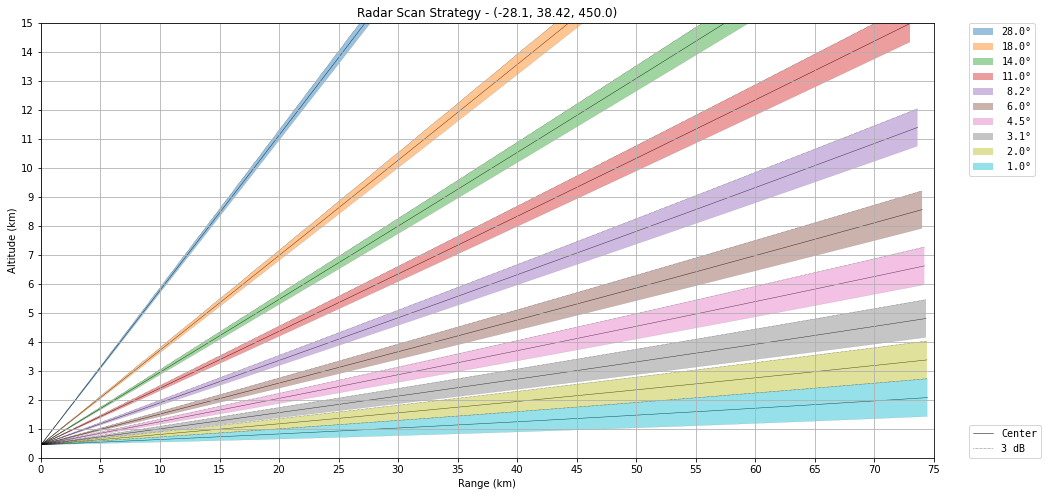

In [5]:
ax = wrl.vis.plot_scan_strategy(
    ranges,
    elevs,
    sitecoords,
    vert_res=1000.0,
    maxalt=15000.0,
    range_res=5000.0,
    maxrange=75000.0,
    units="km",
)

## Change Beamwidth

The beamwidth defaults to 1.0°. It can specified by keyword argument `beamwidth`.

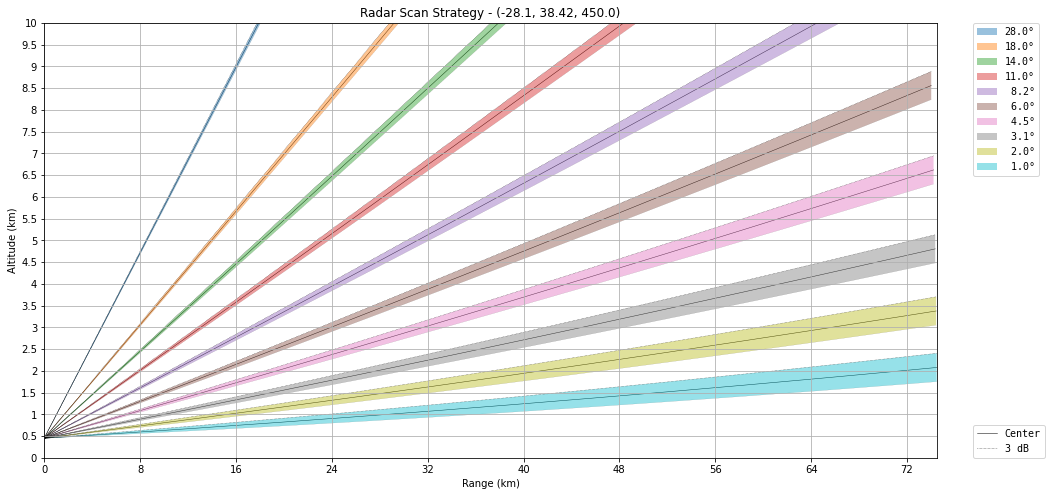

In [6]:
ax = wrl.vis.plot_scan_strategy(ranges, elevs, sitecoords, beamwidth=0.5, units="km")

## Change Colors

The colorcycle can be changed from the default `tab10` to any colormap available in matplotlib. If the output is intended to be plotted as grey-scale, the use of the Perceptually Uniform Sequential colormaps (eg. `viridis`, `cividis`) is suggested. 

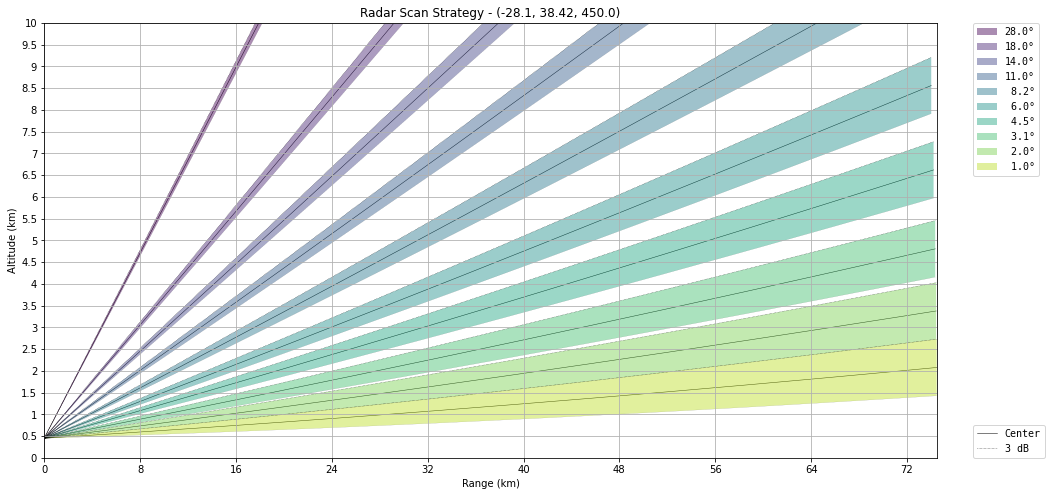

In [7]:
ax = wrl.vis.plot_scan_strategy(ranges, elevs, sitecoords, units="km", cmap="viridis")

## Plot Terrain

A terrain profile can be added to the plot by specifying keyword argument `terrain=True` which automatically downloads neccessary SRTM DEM data and calculates the terrain profile. Additionally the azimuth angle need to be set via keyword argument `az` (it would default to `0`, pointing due north).

For this to work the `WRADLIB_DATA` environment variable has to point a writable folder. Aditionally users need an [earthdata account](https://urs.earthdata.nasa.gov/) with bearer token.

In [8]:
# only run if environment variables are set
import os

has_data = os.environ.get("WRADLIB_EARTHDATA_BEARER_TOKEN", False)

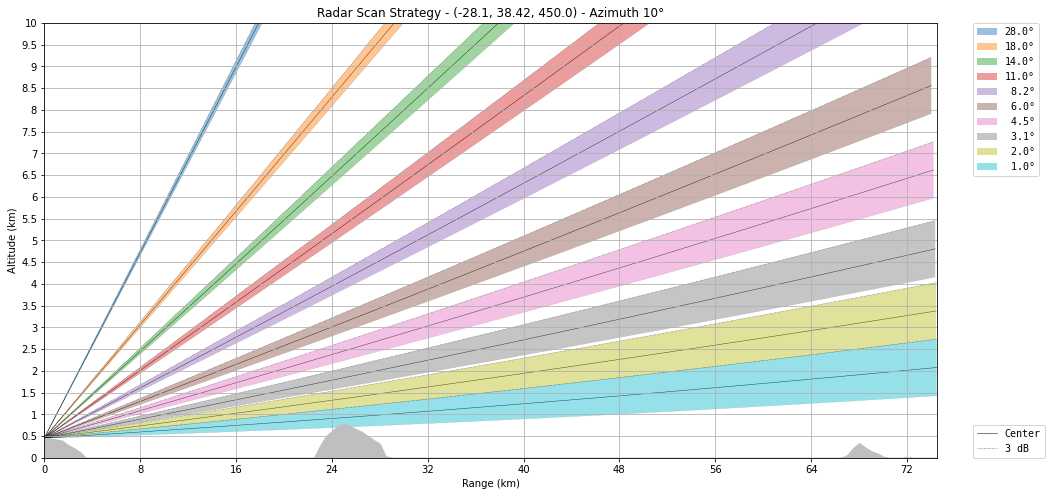

In [9]:
if has_data:
    ax = wrl.vis.plot_scan_strategy(
        ranges, elevs, sitecoords, units="km", terrain=True, az=10
    )

Instead of downloading the SRTM data a precomputed terrain profile can be plotted. Just for the purpose to show this, the terrain data is calculated via the same mechanism as in plot_scan_strategy. The profile should be fed via the same keyword argument `terrain`.

In [10]:
xyz, rad = wrl.georef.spherical_to_xyz(ranges, [10.0], elevs, sitecoords, squeeze=True)
ll = wrl.georef.reproject(xyz, projection_source=rad)
# (down-)load srtm data
ds = wrl.io.get_srtm(
    [ll[..., 0].min(), ll[..., 0].max(), ll[..., 1].min(), ll[..., 1].max()],
)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(
    ds, nodata=-32768.0
)
# map rastervalues to polar grid points
terrain = wrl.ipol.cart_to_irregular_spline(
    rastercoords, rastervalues, ll[-1, ..., :2], order=3, prefilter=False
)

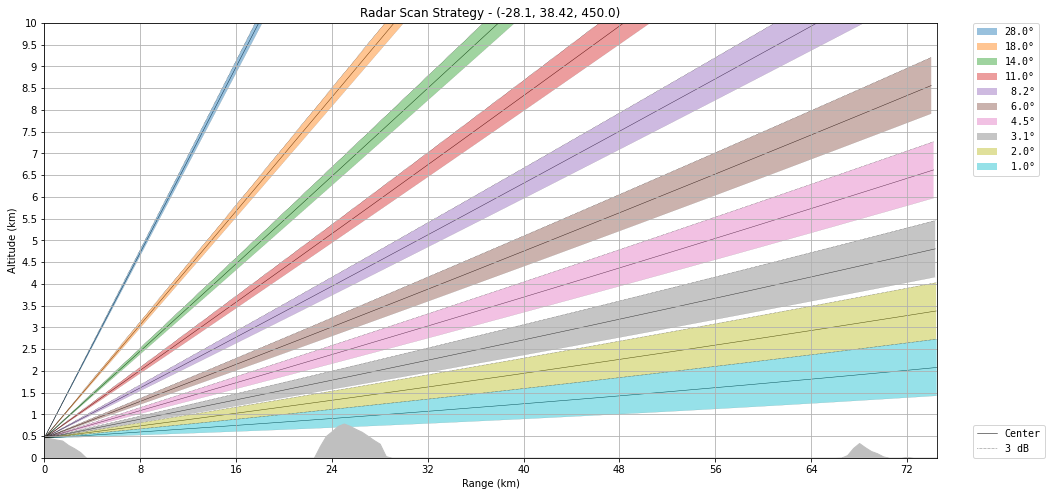

In [11]:
if has_data:
    ax = wrl.vis.plot_scan_strategy(
        ranges, elevs, sitecoords, units="km", terrain=terrain
    )

## Plotting in grids

The keyword argument `ax` can be used to specify the axes to plot in.

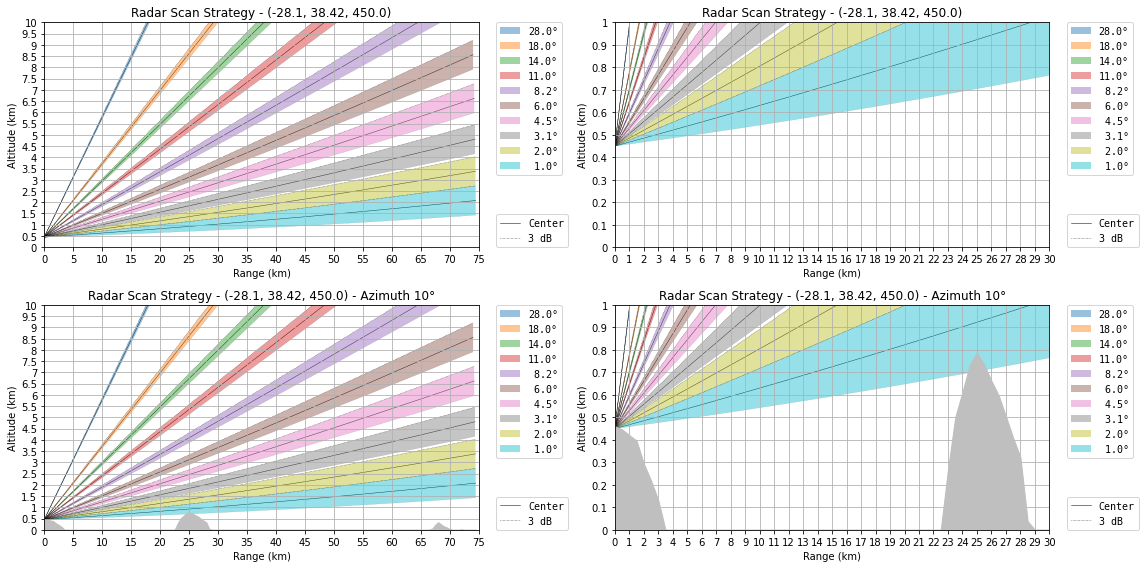

In [12]:
if has_data:
    fig = pl.figure(figsize=(16, 8))
    ax1 = 221
    ax1 = wrl.vis.plot_scan_strategy(
        ranges,
        elevs,
        sitecoords,
        beamwidth=1.0,
        vert_res=500.0,
        range_res=5000.0,
        maxrange=75000.0,
        units="km",
        terrain=None,
        ax=ax1,
    )
    ax2 = 222
    ax2 = wrl.vis.plot_scan_strategy(
        ranges,
        elevs,
        sitecoords,
        beamwidth=1.0,
        vert_res=100.0,
        maxalt=1000.0,
        range_res=1000.0,
        maxrange=30000.0,
        units="km",
        terrain=None,
        ax=ax2,
    )
    ax3 = 223
    ax3 = wrl.vis.plot_scan_strategy(
        ranges,
        elevs,
        sitecoords,
        beamwidth=1.0,
        vert_res=500.0,
        range_res=5000.0,
        maxrange=75000.0,
        units="km",
        terrain=True,
        az=10,
        ax=ax3,
    )
    ax4 = 224
    ax4 = wrl.vis.plot_scan_strategy(
        ranges,
        elevs,
        sitecoords,
        beamwidth=1.0,
        vert_res=100.0,
        maxalt=1000.0,
        range_res=1000.0,
        maxrange=30000.0,
        units="km",
        terrain=True,
        az=10,
        ax=ax4,
    )
    pl.tight_layout()

## Plotting with curvelinear grid

All of the above shown plotting into a cartesian coordinate system is also possible with a curvelinear grid. Just set keyword argument `cg=True`. The thick black line denotes the earth mean sea level (MSL).

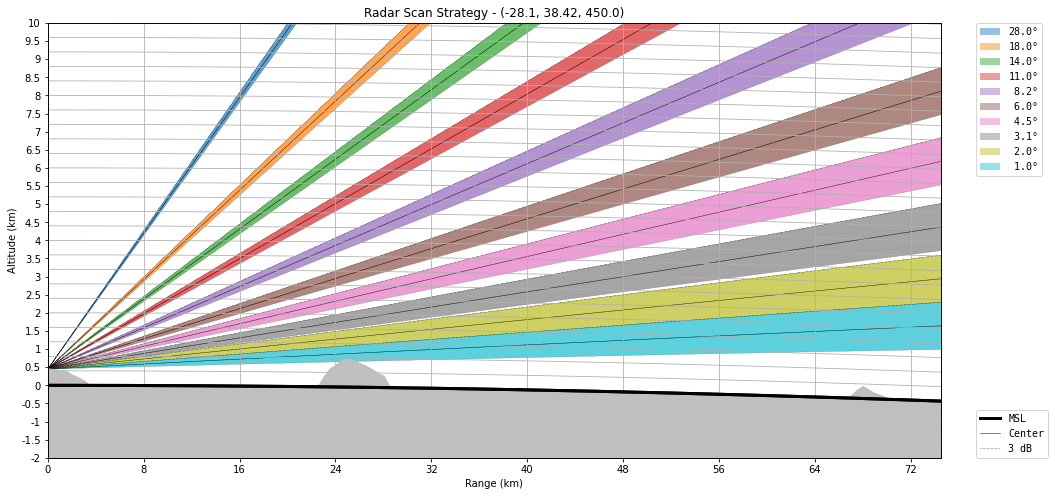

In [13]:
if has_data:
    ax = wrl.vis.plot_scan_strategy(
        ranges, elevs, sitecoords, units="km", cg=True, terrain=terrain
    )